# Comparaison des 4 Modèles

Analyse comparative des performances:
1. CNN Custom
2. ResNet-50
3. EfficientNet-B3
4. MobileNetV3-Large

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Charger les Résultats

In [5]:
# Charger les résultats des trois modèles
results = {}
base_path = Path('../models')
result_files = {
    'CNN Custom': base_path / 'results_cnn_custom.json',
    'ResNet-50': base_path / 'results_resnet.json',
    'EfficientNet-B3': base_path / 'results_efficientnet.json',
    'MobileNetV3-Large': base_path / 'results_mobilenet.json'
}

def normalize_result(result):
    perf = result.get('performance', {})
    if 'best_val_acc' not in result:
        result['best_val_acc'] = perf.get('best_val_acc')
    if 'test_acc' not in result:
        result['test_acc'] = perf.get('test_acc')
    if 'num_params' not in result:
        arch = result.get('architecture', {})
        if 'total_params' in arch:
            result['num_params'] = arch['total_params']
    history = result.get('history', {})
    if result.get('best_val_acc') is None and 'val_acc' in history:
        result['best_val_acc'] = max(history['val_acc'])
    if result.get('test_acc') is None:
        result['test_acc'] = float('nan')
    if result.get('num_params') is None:
        result['num_params'] = float('nan')
    return result

for model_name, file_path in result_files.items():
    if file_path.exists():
        with open(file_path, 'r') as f:
            results[model_name] = normalize_result(json.load(f))
    else:
        print(f"⚠️  Fichier {file_path} non trouvé")

print(f"✅ Résultats chargés pour {len(results)} modèles")

✅ Résultats chargés pour 4 modèles


## 2. Tableau Comparatif

In [6]:
# Créer tableau comparatif
comparison_data = []

for model_name, result in results.items():
    comparison_data.append({
        'Modèle': model_name,
        'Val Accuracy (%)': f"{result['best_val_acc']:.2f}",
        'Test Accuracy (%)': f"{result['test_acc']:.2f}",
        'Paramètres (M)': f"{result['num_params'] / 1e6:.2f}",
    })

df_comparison = pd.DataFrame(comparison_data)
print("\n📊 Comparaison des Modèles:")
print(df_comparison.to_string(index=False))

# Identifier le meilleur
best_model = max(results.items(), key=lambda x: x[1]['test_acc'])
print(f"\n🏆 Meilleur modèle: {best_model[0]} avec {best_model[1]['test_acc']:.2f}% de test accuracy")


📊 Comparaison des Modèles:
           Modèle Val Accuracy (%) Test Accuracy (%) Paramètres (M)
       CNN Custom            76.06             85.45           4.82
        ResNet-50            98.48             97.58          24.56
  EfficientNet-B3            98.79             98.79          10.71
MobileNetV3-Large            95.15             94.85           4.22

🏆 Meilleur modèle: EfficientNet-B3 avec 98.79% de test accuracy


## 3. Visualisations Comparatives

C:\Users\zaineb\AppData\Local\Temp\ipykernel_22216\3106418923.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_names, rotation=15)


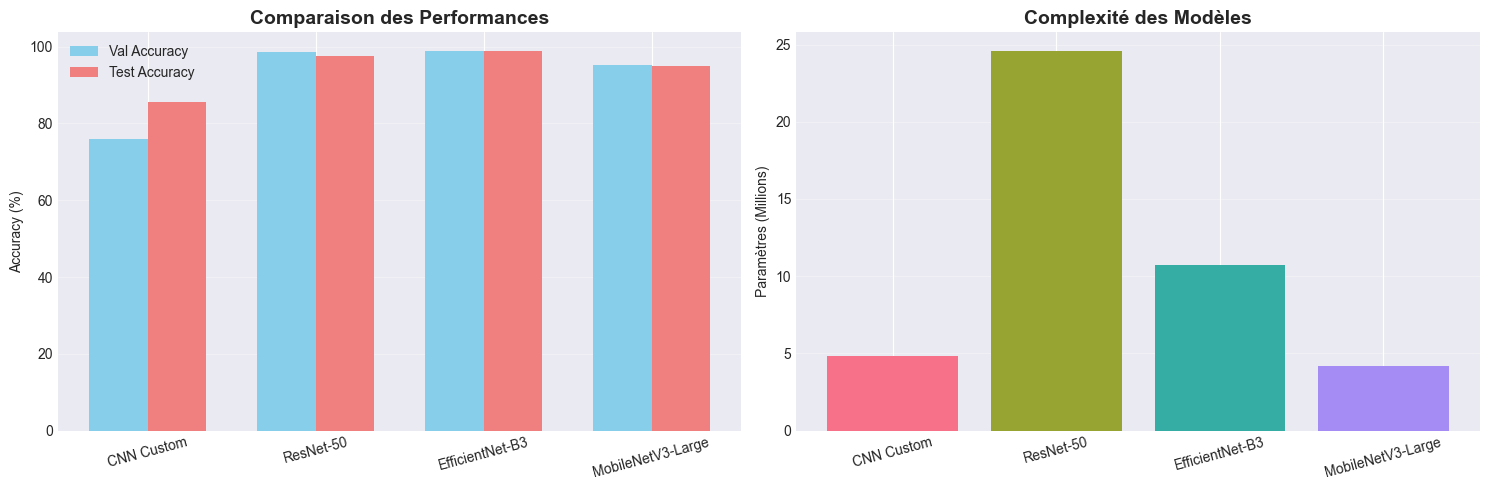

In [7]:
# Comparaison des accuracies
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Val Accuracy
val_accs = [results[m]['best_val_acc'] for m in results.keys()]
test_accs = [results[m]['test_acc'] for m in results.keys()]
model_names = list(results.keys())

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, val_accs, width, label='Val Accuracy', color='skyblue')
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', color='lightcoral')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Comparaison des Performances', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=15)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Nombre de paramètres
params = [results[m]['num_params'] / 1e6 for m in results.keys()]
colors = sns.color_palette("husl", len(model_names))
axes[1].bar(model_names, params, color=colors)
axes[1].set_ylabel('Paramètres (Millions)')
axes[1].set_title('Complexité des Modèles', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(model_names, rotation=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Courbes d'Apprentissage

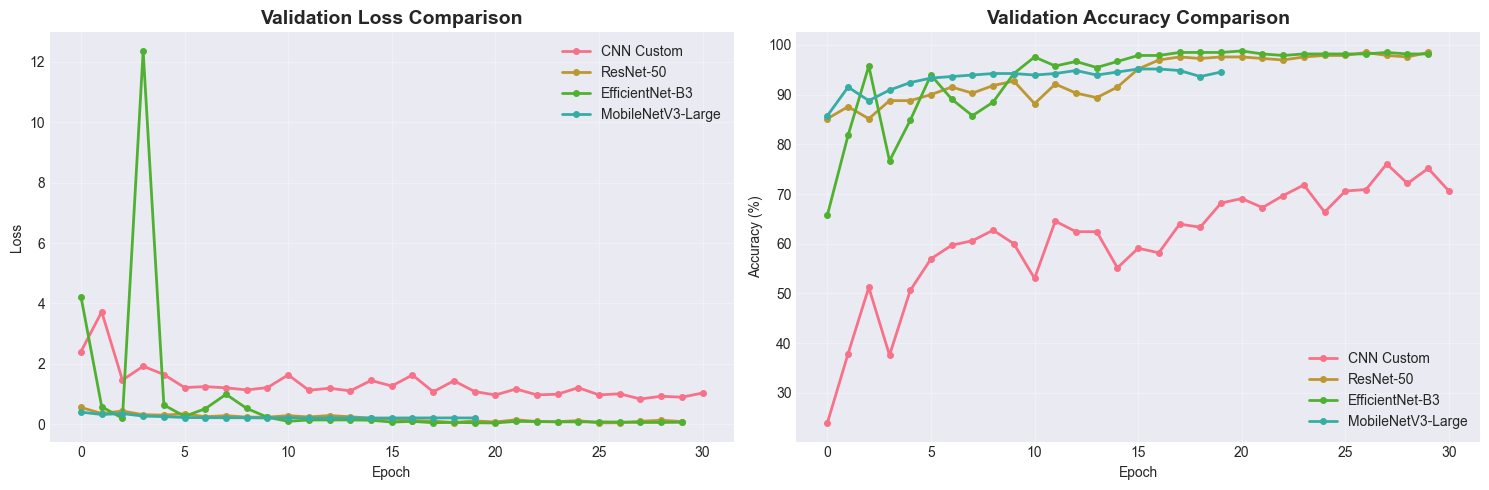

In [8]:
# Comparer les courbes d'apprentissage
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model_order = [
    'CNN Custom',
    'ResNet-50',
    'EfficientNet-B3',
    'MobileNetV3-Large',
]
plot_models = [name for name in model_order if name in results]

# Loss
for model_name in plot_models:
    history = results[model_name]['history']
    axes[0].plot(
        history['val_loss'],
        label=model_name,
        linewidth=2,
        marker='o',
        markersize=4,
    )

axes[0].set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy
for model_name in plot_models:
    history = results[model_name]['history']
    axes[1].plot(
        history['val_acc'],
        label=model_name,
        linewidth=2,
        marker='o',
        markersize=4,
    )

axes[1].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Analyse Performance vs Complexité

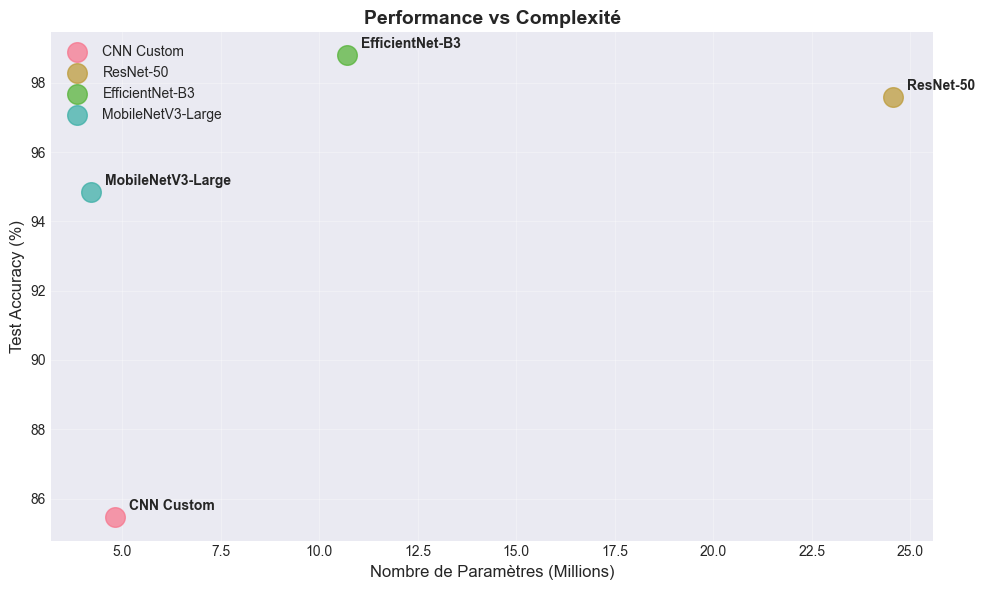

In [9]:
# Scatter plot: Test Accuracy vs Nombre de paramètres
plt.figure(figsize=(10, 6))

for model_name, result in results.items():
    params = result['num_params'] / 1e6
    test_acc = result['test_acc']
    plt.scatter(params, test_acc, s=200, label=model_name, alpha=0.7)
    plt.annotate(model_name, (params, test_acc), 
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.xlabel('Nombre de Paramètres (Millions)', fontsize=12)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.title('Performance vs Complexité', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 6. Recommandations

In [10]:
print("\n" + "="*60)
print("📋 RECOMMANDATIONS")
print("="*60)

# Trouver le meilleur par critère
best_accuracy = max(results.items(), key=lambda x: x[1]['test_acc'])
smallest_model = min(results.items(), key=lambda x: x[1]['num_params'])

# Calculer efficiency score (accuracy / params)
efficiency = {}
for model_name, result in results.items():
    efficiency[model_name] = result['test_acc'] / (result['num_params'] / 1e6)
best_efficiency = max(efficiency.items(), key=lambda x: x[1])

print(f"\n🏆 Meilleure Accuracy:")
print(f"   {best_accuracy[0]}: {best_accuracy[1]['test_acc']:.2f}%")

print(f"\n⚡ Modèle le Plus Léger:")
print(f"   {smallest_model[0]}: {smallest_model[1]['num_params']/1e6:.2f}M paramètres")

print(f"\n💎 Meilleur Rapport Performance/Taille:")
print(f"   {best_efficiency[0]}: {best_efficiency[1]:.2f} acc/M_params")

print("\n📱 Pour déploiement mobile:")
print("   → Privilégier EfficientNet-B3 (léger et performant)")

print("\n🖥️  Pour serveur avec GPU:")
print(f"   → Utiliser {best_accuracy[0]} (meilleure accuracy)")

print("\n🔬 Pour recherche/expérimentation:")
print("   → CNN Custom (plus flexible et modifiable)")

print("\n" + "="*60)


📋 RECOMMANDATIONS

🏆 Meilleure Accuracy:
   EfficientNet-B3: 98.79%

⚡ Modèle le Plus Léger:
   MobileNetV3-Large: 4.22M paramètres

💎 Meilleur Rapport Performance/Taille:
   MobileNetV3-Large: 22.50 acc/M_params

📱 Pour déploiement mobile:
   → Privilégier EfficientNet-B3 (léger et performant)

🖥️  Pour serveur avec GPU:
   → Utiliser EfficientNet-B3 (meilleure accuracy)

🔬 Pour recherche/expérimentation:
   → CNN Custom (plus flexible et modifiable)



## 7. Export du Rapport

In [11]:
# Créer rapport final
report = {
    'comparison': comparison_data,
    'best_accuracy': {
        'model': best_accuracy[0],
        'accuracy': float(best_accuracy[1]['test_acc'])
    },
    'smallest_model': {
        'model': smallest_model[0],
        'params': int(smallest_model[1]['num_params'])
    },
    'best_efficiency': {
        'model': best_efficiency[0],
        'score': float(best_efficiency[1])
    }
}

with open('model_comparison_report.json', 'w') as f:
    json.dump(report, f, indent=2)

print("✅ Rapport de comparaison sauvegardé: model_comparison_report.json")

✅ Rapport de comparaison sauvegardé: model_comparison_report.json
